In [1]:
import random
import pandas as pd
import wandb
import math

In [2]:
# Start a new run
run = wandb.init(project='custom-charts',
                 notes='Custom stacked bar chart')
offset = random.random()

# Set up data to log in custom charts
data = []
for i in range(100):
  data.append([i, random.random() + math.log(1 + i) + offset + random.random()])

# Create a table with the columns to plot
table = wandb.Table(data=data, columns=["step", "height"])

# Map from the table's columns to the chart's fields
fields = {"x": "step",
          "value": "height"}

# Use the table to populate the new custom chart preset
# To use your own saved chart preset, change the vega_spec_name
my_custom_chart = wandb.plot_table(vega_spec_name="carey/new_chart",
              data_table=table,
              fields=fields,
              )

# Log the plot to have it show up in the UI
wandb.log({"custom_chart": my_custom_chart})

# Finally, end the run. We only need this ine in Jupyter notebooks.
run.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: linusrd. Use `wandb login --relogin` to force relogin


In [1]:
api = wandb.Api()
entity, project = "linusrd", "Deep Optimization with Constraints"
runs = api.runs(entity + "/" + project)

summary_list, config_list, name_list = [], [], []
for run in runs:
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, "config": config_list, "name": name_list}
)

runs_df.to_json("project.json")

In [2]:
runs_df

,summary,config,name
0,"{'total_infeasible_solutions': 0, '_wandb': {'...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_4_run_1_None
1,"{'total_eval': 12608, 'mean_fitness': -400, 'p...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_4_run_2_None
2,"{'population_size': 100, 'current_iteration': ...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_4_run_3_None
3,"{'population_size': 100, 'constraint_method': ...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_4_run_4_None
4,"{'total_feasible_solutions_count': 2, 'depth':...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_4_run_5_None
...,...,...,...
175,"{'current_iteration': 1, 'depth': 6, 'dataset'...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_20_run_1_lagrangian
176,"{'_step': 19, '_wandb': {'runtime': 483}, 'fit...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_20_run_2_lagrangian
177,"{'depth': 6, '_timestamp': 1723439384.453972, ...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_20_run_3_lagrangian
178,"{'total_infeasible_solutions': 0, 'total_feasi...","{'encode': True, 'l1_coef': 0.0001, 'l2_coef':...",ssjsp_20_run_4_lagrangian


In [15]:
runs_df['summary']

0      {'total_infeasible_solutions': 0, '_wandb': {'...
1      {'total_eval': 12608, 'mean_fitness': -400, 'p...
2      {'population_size': 100, 'current_iteration': ...
3      {'population_size': 100, 'constraint_method': ...
4      {'total_feasible_solutions_count': 2, 'depth':...
                             ...                        
175    {'current_iteration': 1, 'depth': 6, 'dataset'...
176    {'_step': 19, '_wandb': {'runtime': 483}, 'fit...
177    {'depth': 6, '_timestamp': 1723439384.453972, ...
178    {'total_infeasible_solutions': 0, 'total_feasi...
179    {'solutions': [{'feasible': True, 'makespans':...
Name: summary, Length: 180, dtype: object

In [26]:
import pandas as pd
import json

# Load the JSON data
with open('../notebooks/project.json') as f:
    data = json.load(f)

# Extract the 'summary' column which contains nested dictionaries
summary_data = data['summary']

# Convert the nested dictionaries into a list of records for DataFrame creation
flattened_data = [summary_data[key] for key in summary_data]

# Create a DataFrame from the flattened data
df = pd.DataFrame(flattened_data)

# Convert appropriate columns to numeric types
numeric_cols = [
    'total_infeasible_solutions', '_runtime', '_timestamp',
    'current_iteration', 'mean_fitness', 'min_max_fitness',
    'population_size', '_step', 'depth', 'total_eval',
    'total_feasible_solutions_count'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame structure and first few rows
df_info = df.info()
df_head = df.head()

df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   total_infeasible_solutions      179 non-null    float64
 1   _wandb                          179 non-null    object 
 2   dataset                         180 non-null    object 
 3   _runtime                        180 non-null    float64
 4   _timestamp                      180 non-null    float64
 5   fitness_plot                    179 non-null    object 
 6   current_iteration               180 non-null    int64  
 7   mean_fitness                    180 non-null    float64
 8   min_max_fitness                 180 non-null    int64  
 9   population_size                 180 non-null    int64  
 10  _step                           180 non-null    int64  
 11  depth                           180 non-null    int64  
 12  constraint_method               120 

In [27]:
df_head

,total_infeasible_solutions,_wandb,dataset,_runtime,_timestamp,fitness_plot,current_iteration,mean_fitness,min_max_fitness,population_size,_step,depth,constraint_method,solutions,total_eval,total_feasible_solutions_count
0,0.0,{'runtime': 8},ssjsp_4,9.147986,1.723424e+09,{'sha256': '095e27c0ca38f8d57a61566bacdc401f2c...,1,-400.00000,-400,100,7,6,None,"[{'feasible': True, 'makespans': [20, 20], 'in...",12617,1.0
1,0.0,{'runtime': 7},ssjsp_4,9.011218,1.723424e+09,"{'width': 1000, 'format': 'png', 'height': 600...",2,-400.00000,-400,100,7,6,None,"[{'solution_number': 1, 'feasible': True, 'mak...",12608,1.0
2,0.0,{'runtime': 8},ssjsp_4,9.328407,1.723424e+09,"{'format': 'png', 'height': 600, 'sha256': '47...",3,-400.00000,-400,100,7,6,None,"[{'feasible': True, 'makespans': [20, 20], 'in...",12623,1.0
3,0.0,{'runtime': 7},ssjsp_4,9.117336,1.723424e+09,{'path': 'media/images/fitness_plot_6_fc9db0ab...,4,-399.98999,-400,100,7,6,None,"[{'solution_number': 1, 'feasible': True, 'mak...",12612,1.0
4,0.0,{'runtime': 7},ssjsp_4,9.046602,1.723424e+09,{'path': 'media/images/fitness_plot_6_485fc586...,5,-400.00000,-400,100,7,6,None,"[{'infeasible_jobs': 0, 'solution_number': 1, ...",12620,2.0


In [28]:
# Flatten the solutions data for analysis
solution_data = []

for idx, row in df.iterrows():
    if isinstance(row['solutions'], list):
        for solution in row['solutions']:
            solution_data.append({
                'iteration': row['current_iteration'],
                'makespan': solution['makespans'][0] if solution['makespans'] else None,  # Taking the first makespan
                'feasible': solution['feasible'],
                'infeasible_jobs': solution.get('infeasible_jobs', 0),
                'population_size': row['population_size'],
                'constraint_method': row['constraint_method'] or 'none'
            })

solution_df = pd.DataFrame(solution_data)

# Display the flattened solution data
solution_df.head()

,iteration,makespan,feasible,infeasible_jobs,population_size,constraint_method
0,1,20,True,0,100,none
1,2,20,True,0,100,none
2,3,20,True,0,100,none
3,4,20,True,0,100,none
4,5,20,True,0,100,none


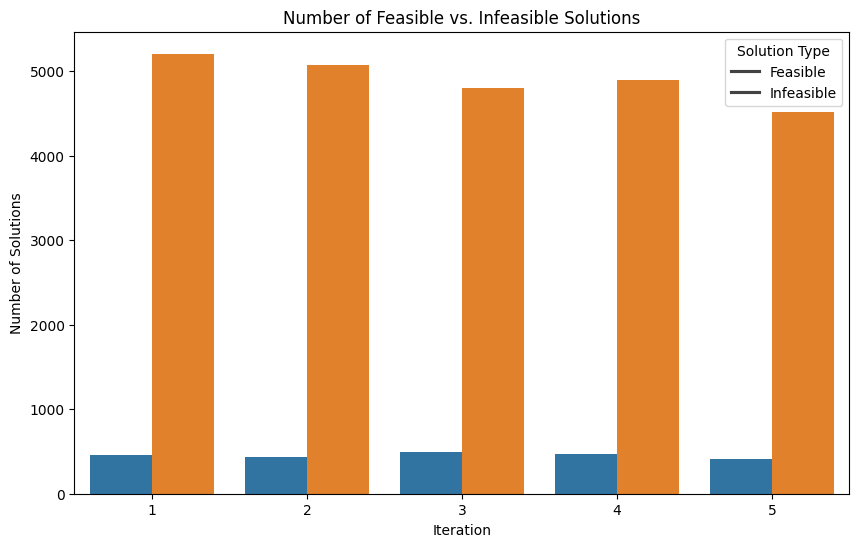

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for feasibility analysis
feasibility_data = df.groupby('current_iteration').agg({
    'total_feasible_solutions_count': 'sum',
    'total_infeasible_solutions': 'sum'
}).reset_index()

# Plotting feasible vs infeasible solutions
plt.figure(figsize=(10, 6))
sns.barplot(x='current_iteration', y='value', hue='variable',
            data=pd.melt(feasibility_data, ['current_iteration']))
plt.title('Number of Feasible vs. Infeasible Solutions')
plt.xlabel('Iteration')
plt.ylabel('Number of Solutions')
plt.legend(title='Solution Type', labels=['Feasible', 'Infeasible'])
plt.show()

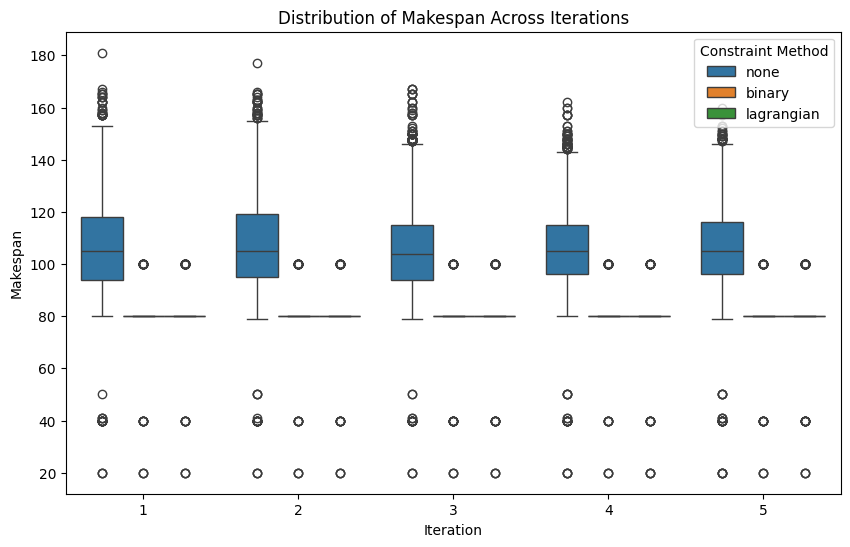

In [30]:
# Plot makespan distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='iteration', y='makespan', hue='constraint_method', data=solution_df)
plt.title('Distribution of Makespan Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Makespan')
plt.legend(title='Constraint Method')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

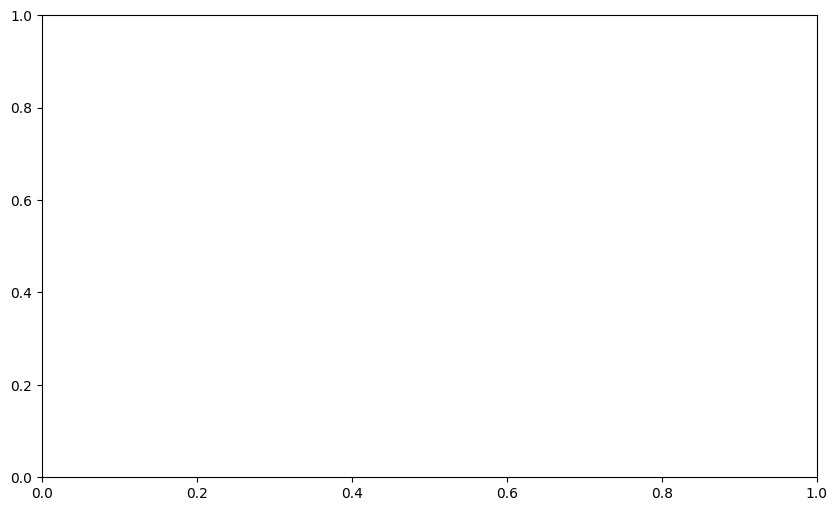

In [31]:
# Plot mean fitness over iterations
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='current_iteration', y='mean_fitness', hue='population_size', marker='o')
plt.title('Mean Fitness Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Fitness')
plt.legend(title='Population Size')
plt.show()


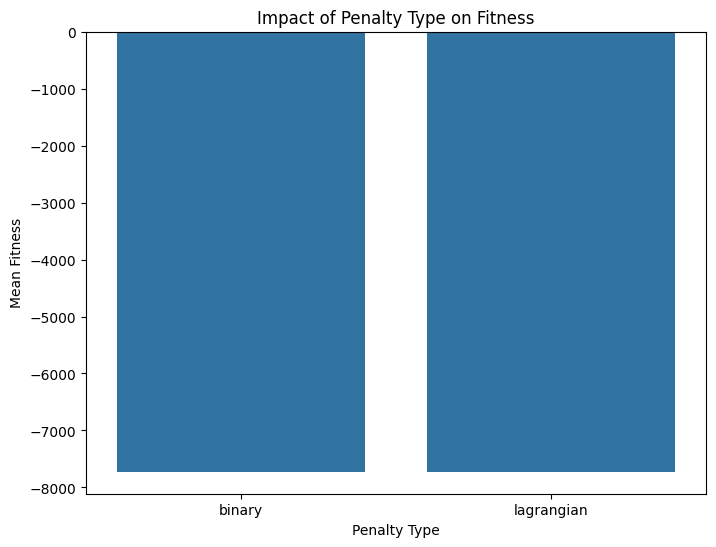

In [32]:
# Aggregate mean fitness by constraint method
penalty_effect = df.groupby('constraint_method').agg({
    'mean_fitness': 'mean'
}).reset_index()

# Plot penalty effect on fitness
plt.figure(figsize=(8, 6))
sns.barplot(data=penalty_effect, x='constraint_method', y='mean_fitness')
plt.title('Impact of Penalty Type on Fitness')
plt.xlabel('Penalty Type')
plt.ylabel('Mean Fitness')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

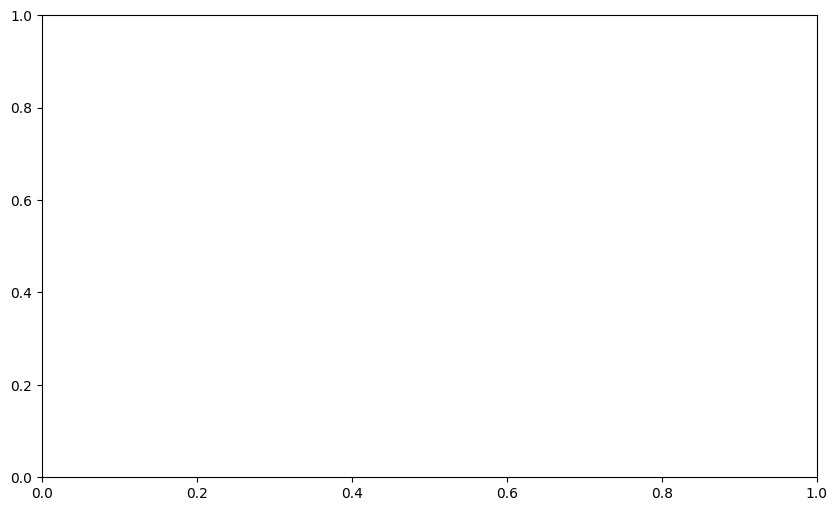

In [33]:
# Aggregate runtime by population size
runtime_data = df.groupby('population_size').agg({
    '_runtime': 'mean'
}).reset_index()

# Plot runtime vs population size
plt.figure(figsize=(10, 6))
sns.lineplot(data=runtime_data, x='population_size', y='_runtime', marker='o')
plt.title('Runtime vs. Population Size')
plt.xlabel('Population Size')
plt.ylabel('Runtime (seconds)')
plt.show()


In [39]:
aa = df.groupby(['dataset', 'constraint_method', 'population_size', 'total_eval']).agg({
    'mean_fitness': 'mean'
}).reset_index()

In [40]:
aa

,dataset,constraint_method,population_size,total_eval,mean_fitness
0,ssjsp_16,binary,100,22797,-6400.000000
1,ssjsp_16,binary,100,22871,-6400.000000
2,ssjsp_16,binary,100,22877,-6400.000000
3,ssjsp_16,binary,100,23187,-6400.000000
4,ssjsp_16,binary,100,24938,-6400.000000
...,...,...,...,...,...
115,ssjsp_8,lagrangian,10000,1521324,-1599.996948
116,ssjsp_8,lagrangian,10000,1724227,-1599.705322
117,ssjsp_8,lagrangian,10000,1733061,-1600.000000
118,ssjsp_8,lagrangian,10000,1742416,-1600.000000


In [42]:
aa[aa['dataset']=='ssjsp_16']

,dataset,constraint_method,population_size,total_eval,mean_fitness
0,ssjsp_16,binary,100,22797,-6400.000000
1,ssjsp_16,binary,100,22871,-6400.000000
2,ssjsp_16,binary,100,22877,-6400.000000
3,ssjsp_16,binary,100,23187,-6400.000000
4,ssjsp_16,binary,100,24938,-6400.000000
5,ssjsp_16,binary,1000,228404,-6399.979004
6,ssjsp_16,binary,1000,228972,-6399.897949
7,ssjsp_16,binary,1000,229096,-6399.959961
8,ssjsp_16,binary,1000,229982,-6399.825195
9,ssjsp_16,binary,1000,249837,-6399.958008


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

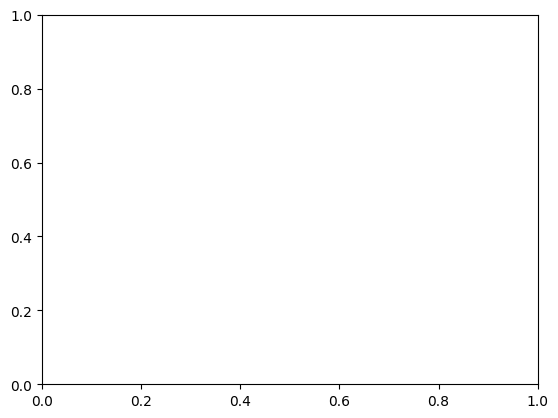

In [49]:
sns.lineplot(x=aggregated_df['total_eval'].to_numpy(), y=aggregated_df['mean_fitness'].to_numpy())

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

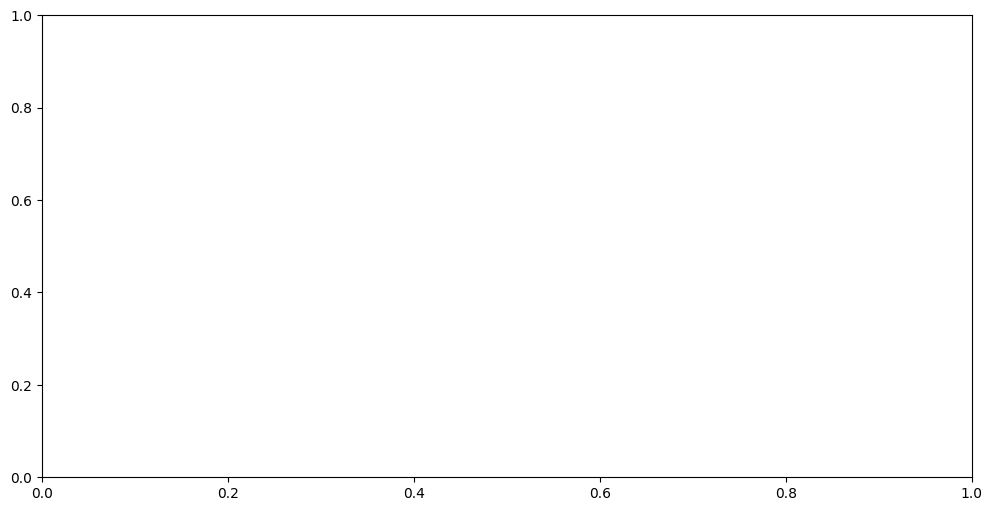

In [38]:
# Aggregate data by averaging the mean fitness over evaluations for each experiment configuration
# Average the runs into a single line per configuration
aggregated_df = df.groupby(['dataset', 'constraint_method', 'population_size', 'total_eval']).agg({
    'mean_fitness': 'mean'
}).reset_index()

# Plot the mean fitness over evaluations
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_eval', y='mean_fitness', hue='constraint_method', style='dataset', data=aggregated_df, markers=True, dashes=False)
plt.title('Mean Fitness Over Evaluations')
plt.xlabel('Total Evaluations')
plt.ylabel('Mean Fitness')
plt.xscale('log')
plt.legend(title='Constraint Method')
plt.show()
